In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from pandas_datareader import data as pdr 
import yfinance as yf
yf.pdr_override()
%matplotlib inline

In [2]:
SP = pdr.get_data_yahoo('SPY',start = "2008-01-01", end = "2018-04-01")['Close']

[*********************100%***********************]  1 of 1 completed


In [3]:
SP = pd.DataFrame(SP)

In [4]:
_month = 0 
_tdom = ''

def TDOM(a):
    global _tdom, _month 
    if _tdom == '' and a.month >1:
        _tdom = ''
    elif _month != a.month:
        _tdom = 1 
        _month = a.month
    else:
        _tdom += 1
    return _tdom

SP['TDOM'] = SP.index
SP['TDOM'] = SP.TDOM.apply(TDOM)
print (SP.head())
        

                 Close TDOM
Date                       
2007-12-31  146.210007     
2008-01-02  144.929993    1
2008-01-03  144.860001    2
2008-01-04  141.309998    3
2008-01-07  141.190002    4


In [5]:
SP.index

DatetimeIndex(['2007-12-31', '2008-01-02', '2008-01-03', '2008-01-04',
               '2008-01-07', '2008-01-08', '2008-01-09', '2008-01-10',
               '2008-01-11', '2008-01-14',
               ...
               '2018-03-16', '2018-03-19', '2018-03-20', '2018-03-21',
               '2018-03-22', '2018-03-23', '2018-03-26', '2018-03-27',
               '2018-03-28', '2018-03-29'],
              dtype='datetime64[ns]', name='Date', length=2580, freq=None)

In [6]:
#P['Days'] = list(map(lambda x: x.day, (SP.index.tolist())))
#rint (SP)

In [7]:
#SP['Months'] = list(map(lambda x: x.month, (SP.index.tolist())))
#print (SP)

In [8]:
#SP['Years'] = list(map(lambda x: x.year, (SP.index.tolist())))
#print (SP)

In [9]:
#Creating functions for Modular Coding Experience 
def monthly_returns(a):
    monthly = a.asfreq('M').ffill()
    monthly_pc = monthly/monthly.shift(1) - 1 
    monthly_cr = (1 + monthly_pc).cumprod()
    return monthly_cr

def Correlation_Coefficient(b):
    return b.corr(method='pearson')

def graph(c):
    c.plot(kind='scatter', x='SP Close', y='DIS Close')
    plt.title('Monthly Returns')
    plt.show()

In [10]:
Stock = monthly_returns(SP['Close'])

In [11]:
print (Stock)

Date
2007-12-31         NaN
2008-01-31    0.939539
2008-02-29    0.915259
2008-03-31    0.902606
2008-04-30    0.945626
                ...   
2017-10-31    1.758772
2017-11-30    1.812530
2017-12-31    1.812530
2018-01-31    1.928049
2018-02-28    1.857944
Freq: M, Name: Close, Length: 123, dtype: float64


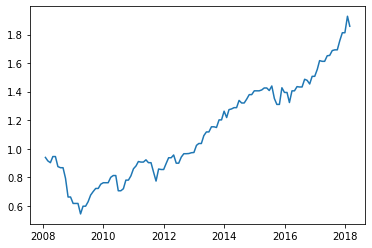

In [12]:
plt.plot(Stock)
plt.show()

In [13]:
DIS = pdr.get_data_yahoo('DIS',start = "2008-01-01", end = "2018-04-01")['Close']

[*********************100%***********************]  1 of 1 completed


In [14]:
SP = SP['Close']

In [15]:
SP = pd.DataFrame(SP)
DIS = pd.DataFrame(DIS)

In [16]:
SP = SP.rename(columns = {'Close':'SP Close'})
DIS = DIS.rename(columns = {'Close':'DIS Close'})

In [17]:
df = pd.concat([SP,DIS], axis = 1, join='inner')

In [18]:
print(df)

              SP Close   DIS Close
Date                              
2007-12-31  146.210007   32.279999
2008-01-02  144.929993   31.840000
2008-01-03  144.860001   31.770000
2008-01-04  141.309998   31.129999
2008-01-07  141.190002   31.160000
...                ...         ...
2018-03-23  258.049988   98.540001
2018-03-26  265.109985  100.650002
2018-03-27  260.600006   99.360001
2018-03-28  259.829987   98.540001
2018-03-29  263.149994  100.440002

[2580 rows x 2 columns]


In [19]:
df.corr(method='pearson')

,SP Close,DIS Close
SP Close,1.00000,0.95492
DIS Close,0.95492,1.00000


In [20]:
MR = monthly_returns(df)

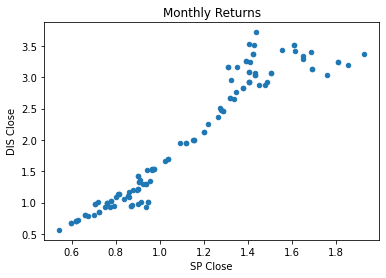

In [23]:
graph(MR)